# Imports

In [1]:
import warnings
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

# Read the Data

In [3]:
df = pd.read_csv("C:/Users/Compu City/Desktop/creativa Ai/creativa_25_Ai_Elec_Tronics-1/insurance.csv")
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data Pre-preocessing

### 1- Data Understanding

- As we can see below that **[PassengerId, Name, Ticket]**, are not important feature for our problem, so we may like to **drop them**.

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


- **Drop Un-necessary Columns**

In [5]:
df.drop(["children"], axis=1, inplace = True)
df.head()

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,18,male,33.770,no,southeast,1725.55230
2,28,male,33.000,no,southeast,4449.46200
3,33,male,22.705,no,northwest,21984.47061
4,32,male,28.880,no,northwest,3866.85520


### 2- Check for Datatypes

- **Display Datatypes**

In [6]:
dtypes = df.dtypes
n_uniq = df.nunique()
pd.DataFrame({"Dtypes": dtypes, "Num_Uniqe": n_uniq}).T

,age,sex,bmi,smoker,region,charges
Dtypes,int64,object,float64,object,object,float64
Num_Uniqe,47,2,548,2,4,1337


- **Change In-correct Datatypes**

In [9]:
cols = ["smoker", "sex"]
df[cols] = df[cols].astype('category')
pd.DataFrame(df.dtypes).T

,age,sex,bmi,smoker,region,charges
0,int64,category,float64,category,object,float64


### 3- Check for Null Values

- **Check for Null Values**

In [10]:
null = df.isnull().sum()
ratio = null / df.shape[0]
pd.DataFrame({"Null_sum": null, "Ratio": ratio}).T

,age,sex,bmi,smoker,region,charges
Null_sum,0.0,0.0,0.0,0.0,0.0,0.0
Ratio,0.0,0.0,0.0,0.0,0.0,0.0


- **Drop Null values in Embarked column**

In [12]:
df = df.dropna(subset=['Embarked'])

KeyError: ['Embarked']

In [13]:
null = df.isnull().sum()
ratio = null / df.shape[0]
pd.DataFrame({"Null_sum": null, "Ratio": ratio}).T

,age,sex,bmi,smoker,region,charges
Null_sum,0.0,0.0,0.0,0.0,0.0,0.0
Ratio,0.0,0.0,0.0,0.0,0.0,0.0


- **Drop Cabin column**

In [28]:
df = df.drop("Cabin", axis=1)

KeyError: "['Cabin'] not found in axis"

- **Replace Null Values in Age column**

In [14]:
plt.figure(figsize=(4, 2))
plt.hist(df['Age'], density=True, edgecolor="black",color="orange")
plt.title("Age Column distribution")
plt.xlabel("Age")
plt.ylabel("Probability")
plt.show()

KeyError: 'Age'

<Figure size 400x200 with 0 Axes>

In [15]:
median = df["Age"].median()
df["Age"].fillna(median, inplace=True)

KeyError: 'Age'

- **Make sure that Null values are removed**

In [16]:
pd.DataFrame(df.isnull().sum()).T

,age,sex,bmi,smoker,region,charges
0,0,0,0,0,0,0


### 4- Handle Outliers

- **Check for Outliers**

ValueError: num must be an integer with 1 <= num <= 2, not 3

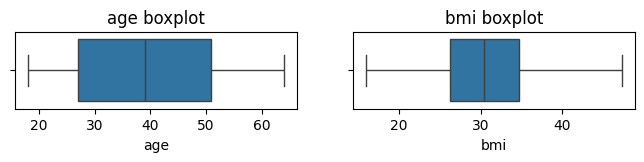

In [21]:
num_cols = df.select_dtypes("number").columns
plt.figure(figsize=(8, 1))
for i, col in enumerate(num_cols):
    plt.subplot(1, 2, i+1)
    sns.boxplot(df[col], orient="h")
    plt.title(f"{col} boxplot")

- **Remove Outliers**

In [19]:
for col in num_cols:
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3 - Q1
    Lower_Fence = Q1 - 1.5 * IQR
    Upper_Fence = Q3 + 1.5 * IQR
    Lower_Outliers = df[df[col] < Lower_Fence][col].values
    Upper_Outliers = df[df[col] > Upper_Fence][col].values
    df[col].replace(Lower_Outliers, Lower_Fence, inplace=True)
    df[col].replace(Upper_Outliers, Upper_Fence, inplace=True)

- **Make Sure Outliers are removed**

ValueError: num must be an integer with 1 <= num <= 2, not 3

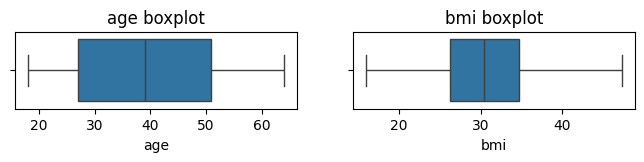

In [22]:
num_cols = df.select_dtypes("number").columns
plt.figure(figsize=(8, 1))
for i, col in enumerate(num_cols):
    plt.subplot(1, 2, i+1)
    sns.boxplot(df[col], orient="h")
    plt.title(f"{col} boxplot")

### 5- Visualization

#### A. Data Distribution Graphs

- **Numerical Data Distribution Graphs**

ValueError: num must be an integer with 1 <= num <= 2, not 3

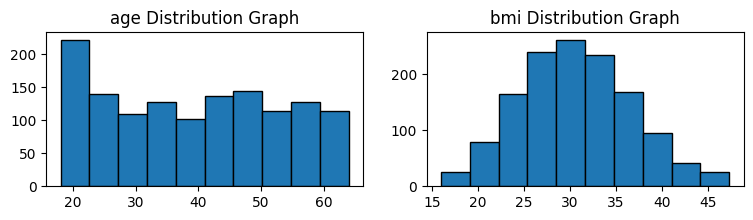

In [23]:
# Histogram
num_cols = df.select_dtypes("number").columns
plt.figure(figsize=(9, 2))
for i, col in enumerate(num_cols):
    plt.subplot(1, 2, i+1)
    plt.hist(df[col], edgecolor="black")
    plt.title(f"{col} Distribution Graph")
plt.show()

ValueError: num must be an integer with 1 <= num <= 2, not 3

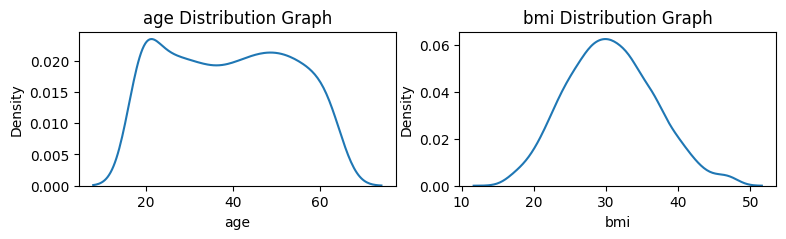

In [24]:
# Kde Plot
num_cols = df.select_dtypes("number").columns
plt.figure(figsize=(9, 2))
for i, col in enumerate(num_cols):
    plt.subplot(1, 2, i+1)
    sns.kdeplot(df[col])
    plt.title(f"{col} Distribution Graph")
plt.show()

- **Categorical Data Distribution Graphs**

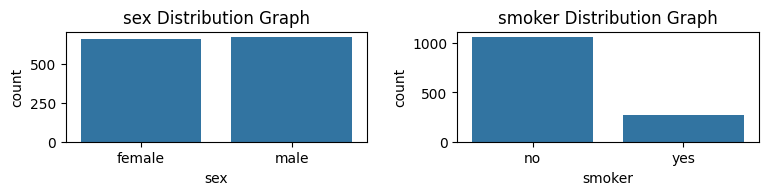

In [25]:
# Count Plot
cat_cols = df.select_dtypes("category").columns
plt.figure(figsize=(14, 4))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=col, data=df)
    plt.title(f"{col} Distribution Graph")
plt.subplots_adjust(hspace=.8, wspace=.3)
plt.show()

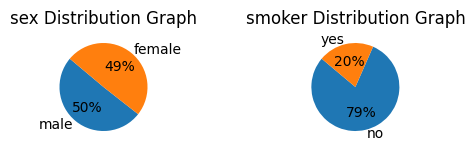

In [26]:
# Pie Plot (not recommended)
cat_cols = df.select_dtypes("category").columns
plt.figure(figsize=(9, 4))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 3, i+1)
    unique = df[col].value_counts()
    count = unique.values
    categories = unique.index
    plt.pie(count, labels = categories, startangle=140, autopct='%1.1d%%')
    plt.title(f"{col} Distribution Graph")
plt.subplots_adjust(hspace=.8, wspace=.3)
plt.show()

#### B. Outlier Detection Graphs

ValueError: num must be an integer with 1 <= num <= 2, not 3

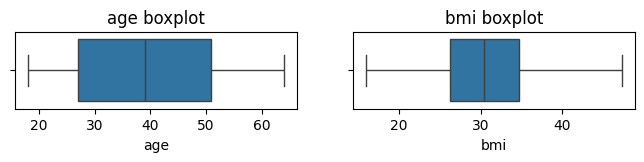

In [27]:
num_cols = df.select_dtypes("number").columns
plt.figure(figsize=(8, 1))
for i, col in enumerate(num_cols):
    plt.subplot(1, 2, i+1)
    sns.boxplot(df[col], orient="h")
    plt.title(f"{col} boxplot")

#### C. Relationship Graphs

- **Numerical/Numerical Relationship**

In [28]:
# Scatter Plot
plt.figure(figsize=(2, 2))
plt.scatter(df["Age"], df["Fare"])
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

KeyError: 'Age'

<Figure size 200x200 with 0 Axes>

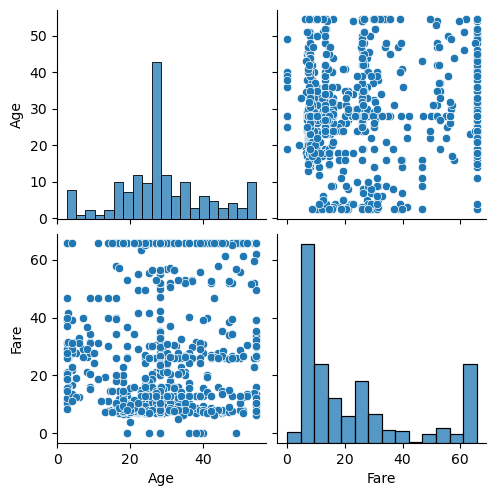

In [22]:
# Pair Plot
sns.pairplot(df)

In [29]:
# Line Plot
sorted_df = df.sort_values(by="Age")
plt.figure(figsize=(2, 2))
plt.plot(sorted_df["Age"], sorted_df["Fare"])
plt.show()

KeyError: 'Age'

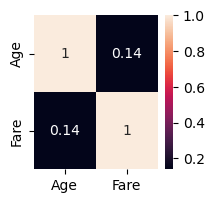

In [24]:
# Heat map
corr = df.corr()
plt.figure(figsize=(2, 2))
sns.heatmap(corr, annot=True)
plt.show()

- **Numerical/Categorical Relationship**

In [30]:
# bar plot
plt.figure(figsize=(2, 2))
sns.barplot(x="Survived", y="Fare", data=df)
plt.show()

ValueError: Could not interpret value `Survived` for `x`. An entry with this name does not appear in `data`.

<Figure size 200x200 with 0 Axes>

- **Categorical/Categorical Relationship**

In [31]:
# Heat map
plt.figure(figsize=(2, 2))
agg = df.pivot_table(index="Survived", columns="Sex", values="Age", aggfunc=len)
sns.heatmap(agg)
plt.show()

KeyError: 'Age'

<Figure size 200x200 with 0 Axes>

### 6- Remove Duplicates 

- **Check for Duplicates**

In [32]:
df.duplicated().sum()

np.int64(1)

- **Remove Duplicates**

In [33]:
df.drop_duplicates(inplace=True)

- **Make Sure that Duplicates are Removed**

In [34]:
df.duplicated().sum()

np.int64(0)

### 7- Data Splitting

In [36]:
X = df.drop("Survived", axis=1)
y = df[["Survived"]]

KeyError: "['Survived'] not found in axis"

### 8- Normalization

In [37]:
from sklearn.preprocessing import MinMaxScaler
num_cols = X.select_dtypes("number").columns
scaler = MinMaxScaler()
scaler.fit(X[num_cols])
X[num_cols] = scaler.transform(X[num_cols])

NameError: name 'X' is not defined

In [38]:
!pip install category_encoders


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### 9- Encoding

- **Check for Number of Unique Values**

In [39]:
str_cols = ["Sex", "Embarked"]
pd.DataFrame(X[str_cols].nunique()).T

NameError: name 'X' is not defined

- **One Hot Encoder**

In [40]:
from category_encoders import OneHotEncoder
encoder = OneHotEncoder(cols = str_cols, drop_invariant=True)
X = encoder.fit_transform(X)

NameError: name 'X' is not defined